In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
x = pd.read_csv(r'C:\Users\HP\ML\Lego_collector_Dilemma\lego_final.csv')

In [3]:
x.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country
0,19,29.99,2,277,4.0,0,4.5,0,4.0,20
1,19,19.99,2,168,4.0,2,5.0,0,4.0,20
2,19,12.99,11,74,4.3,2,4.3,0,4.1,20
3,5,99.99,23,1032,3.6,0,4.6,1,4.3,20
4,5,79.99,14,744,3.2,1,4.6,1,4.1,20


In [4]:
x.describe()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country
count,12261.00000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000
mean,16.68828,65.141998,14.603050,493.405921,3.709689,1.988826,3.917698,20.523367,3.609844,10.015333
std,8.21868,91.980429,34.356847,825.364580,1.641130,1.787565,1.603276,11.990176,1.614694,6.185450
min,0.00000,2.272400,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.00000,19.990000,1.000000,97.000000,3.600000,0.000000,4.000000,9.000000,3.500000,4.000000
50%,19.00000,36.587800,4.000000,216.000000,4.400000,2.000000,4.600000,21.000000,4.200000,10.000000
75%,23.00000,70.192200,11.000000,544.000000,4.700000,4.000000,4.900000,34.000000,4.700000,15.000000
max,30.00000,1104.870000,367.000000,7541.000000,5.000000,5.000000,5.000000,40.000000,5.000000,20.000000


In [5]:
x.isnull().sum()

ages                 0
list_price           0
num_reviews          0
piece_count          0
play_star_rating     0
review_difficulty    0
star_rating          0
theme_name           0
val_star_rating      0
country              0
dtype: int64

In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  int64  
 1   list_price         12261 non-null  float64
 2   num_reviews        12261 non-null  int64  
 3   piece_count        12261 non-null  int64  
 4   play_star_rating   12261 non-null  float64
 5   review_difficulty  12261 non-null  int64  
 6   star_rating        12261 non-null  float64
 7   theme_name         12261 non-null  int64  
 8   val_star_rating    12261 non-null  float64
 9   country            12261 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 958.0 KB


<AxesSubplot:>

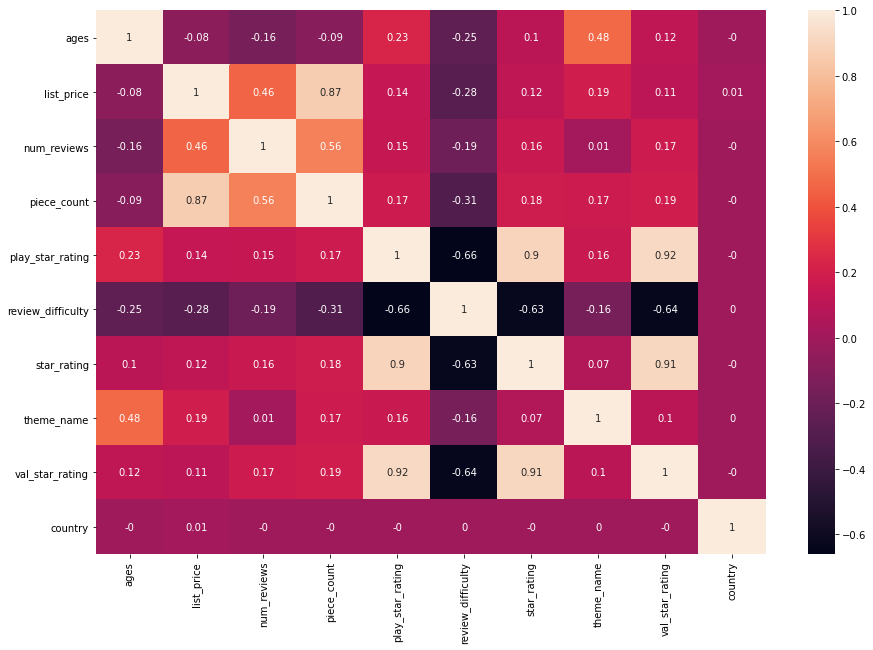

In [7]:
correlation_matrix = x.corr().round(2)
plt.figure(figsize=(15,10))
sns.heatmap(data=correlation_matrix, annot=True)

In [8]:
x.drop(['play_star_rating','val_star_rating', 'review_difficulty'],axis = 1 ,inplace=True)

In [9]:
x.head()

,ages,list_price,num_reviews,piece_count,star_rating,theme_name,country
0,19,29.99,2,277,4.5,0,20
1,19,19.99,2,168,5.0,0,20
2,19,12.99,11,74,4.3,0,20
3,5,99.99,23,1032,4.6,1,20
4,5,79.99,14,744,4.6,1,20


In [10]:
x['ages'].value_counts(dropna=False)

19    1476
23    1421
26    1180
13     957
16     911
0      870
11     840
22     723
29     624
8      420
25     350
14     311
5      298
20     233
24     226
9      213
7      212
3      184
18     148
2      148
10     113
30      92
15      71
4       66
28      46
6       42
17      21
12      21
1       21
27      21
21       2
Name: ages, dtype: int64

In [11]:
x['theme_name'].value_counts(dropna=False)

34    1377
13    1166
6     1092
21     978
38     796
4      765
17     606
37     533
39     505
25     414
8      403
7      332
9      317
26     303
15     285
12     280
24     272
29     263
33     254
1      210
28     197
16     195
10     148
19     128
32      84
27      70
11      32
18      23
22      21
30      21
14      21
31      21
35      21
5       21
36      21
20      21
3       21
2       19
23      16
0        6
40       3
Name: theme_name, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


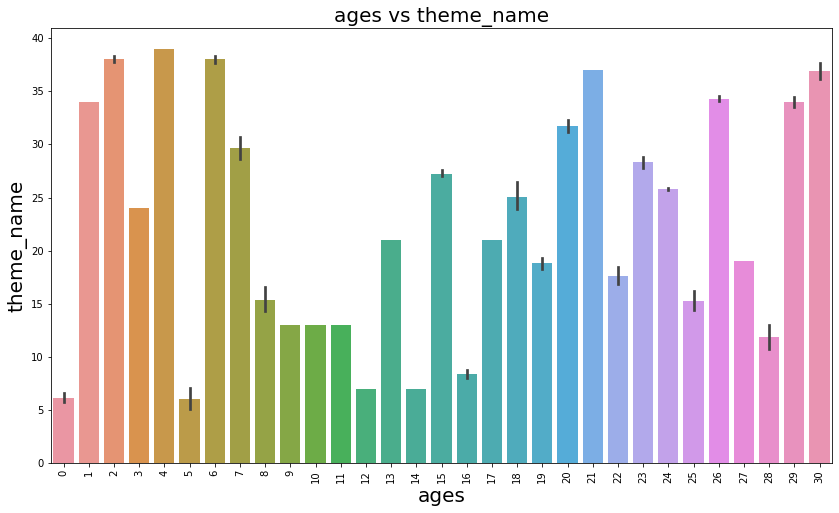

In [12]:
plt.figure(figsize=(14,8))
sns.barplot(x['ages'], x['theme_name'])
plt.xlabel('ages', fontsize=20)
plt.ylabel('theme_name', fontsize=20)
plt.title('ages vs theme_name', fontsize=20)
plt.xticks(rotation = 90)
plt.show()

In [13]:
y=x.list_price 
X=x.drop(columns=['list_price'],axis=1)

In [14]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3,random_state=100)

In [15]:
coef=LinearRegression()
coef.fit(X_train, y_train)

LinearRegression()

In [16]:
Y_pred = coef.predict(X_test)

In [17]:
print(Y_pred)

[23.9235768  36.11279509 45.99374237 ... 78.74285058 74.54041147
 29.55846109]


In [18]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(coef,X,y)
print(scores)

[0.73591846 0.74587084 0.7670575  0.77004098 0.76001756]


In [19]:
print('Variance score: %.2f' % r2_score(y_test, Y_pred))

Variance score: 0.74


In [20]:
from math import sqrt

In [21]:
print(mean_squared_error(y_test, Y_pred))

2120.768186267184


In [22]:
rmse=sqrt(mean_squared_error(y_test, Y_pred))

In [23]:
print(rmse)

46.05179894713326
